In [ ]:
'''
This project seeks to understand the typical locations of recalled food. Further text analysis
 on the reported data will give a better idea of where, why, when, and how to imporve on 
 conditions in decreasing recalls.

Implications: Help food sourcing/providing companies (e.g., supermarkets, 
 meal delivery services) determine where they can reliable source their food.
 Also can help companies decide where to start/move in th country.
 
Data on recalls, FDA: https://open.fda.gov/apis/food/enforcement/download/
Data on acres/operations of food production, USDA: https://quickstats.nass.usda.gov/results/7A1CA2A9-4998-38C1-8A0E-8EDD991E7E49


Livestock & Grain Data: https://catalog.data.gov/dataset/livestock-and-grain-market-news-search
Soil Data: https://catalog.data.gov/dataset/soil-climate-analysis-network-scan


'''

In [1285]:
%pylab inline
import pandas as pd
import pylab as pl
import numpy as np
import json
from collections import Counter
import re
import state_abbrev_dict
from importlib import reload
import nltk



Populating the interactive namespace from numpy and matplotlib


In [401]:
with open('/Users/laurenbittle/jobs_resumes/TDI_challenge/project/food-enforcement-0001-of-0001.json') as data_file:
    data=json.load(data_file)
df=pd.DataFrame(data['results'])


In [403]:
df.columns


Index(['address_1', 'address_2', 'center_classification_date', 'city',
       'classification', 'code_info', 'country', 'distribution_pattern',
       'event_id', 'initial_firm_notification', 'more_code_info', 'openfda',
       'postal_code', 'product_description', 'product_quantity',
       'product_type', 'reason_for_recall', 'recall_initiation_date',
       'recall_number', 'recalling_firm', 'report_date', 'state', 'status',
       'termination_date', 'voluntary_mandated'],
      dtype='object')

In [82]:
print(df.agg({'state': 'nunique'})) # 59 unique states/regions (Canada regions incl)
print(df['state'].unique())

grouped_state=df.groupby('state')

grouped_state.get_group('CA').city.nunique() #careful with capitalization (some are all cap)


state    59
dtype: int64
['CA' 'PA' 'MI' 'WI' 'NJ' 'FL' 'OR' 'IL' 'WA' 'MN' 'TX' 'MA' 'OH' 'AR'
 'TN' 'AZ' 'VT' 'NC' 'IA' 'PR' 'NY' 'CT' 'ND' 'NM' 'MO' 'MD' 'IN' 'NH'
 'OK' 'GA' 'MS' 'CO' 'KY' '' 'LA' 'ME' 'SD' 'UT' 'MT' 'AK' 'KS' 'NE' 'SC'
 'VA' 'WY' 'DE' 'HI' 'ID' 'DC' 'Ontario' 'AL' 'RI' 'NV' 'New Brunswick'
 'WV' 'Quebec' 'Nova Scotia' 'Alberta' 'British Columbia']


190

In [78]:
grouped_classification=df.groupby('classification')
#ca_classI=
grouped_classification.get_group('Class I').shape



(7501, 25)

In [85]:
grouped_state_class=df.groupby(['state','classification'],sort=True)
grouped_state_class.agg({'product_type':'unique'})


product_type
state            classification                 
                 Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
                 Not Yet Classified       [Food]
AK               Class I                  [Food]
                 Class II                 [Food]
AL               Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
                 Not Yet Classified       [Food]
AR               Class I                  [Food]
                 Class II                 [Food]
AZ               Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
Alberta          Class II                 [Food]
                 Class III                [Food]
British Columbia Class II                 [Food]
CA               Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
                 Not Yet Classified       [Food]
CO               Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
CT               Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
DC               Class III                [Food]
DE               Class I                  [Food]
...                                          ...
SC               Class II                 [Food]
                 Class III                [Food]
SD               Class I                  [Food]
TN               Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
TX               Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
                 Not Yet Classified       [Food]
UT               Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
VA               Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
VT               Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
WA               Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
                 Not Yet Classified       [Food]
WI               Class I                  [Food]
                 Class II                 [Food]
                 Class III                [Food]
WV               Class I                  [Food]
                 Class II                 [Food]
WY               Class I                  [Food]
                 Class II                 [Food]

[164 rows x 1 columns]

In [117]:
df[df['city'].str.match('Fullerton')].shape
#df.groupby('city').get_group('Fullerton')

(45, 25)

In [1282]:
df_meat=df[df['product_description'].str.contains('meat')]
print(df_meat.shape)
#df_beef=df[df['product_description'].str.contains('beef')] #4
#print(df_beef.shape)
#df_pork=df[df['product_description'].str.contains('pork')] #3
#print(df_pork.shape)
#df_poultry=df[df['product_description'].str.contains('poultry')] # 0 poultry hits
#print(df_poultry.shape) # 0 poultry hits
df_grain=df[df['product_description'].str.contains('grain')]
print(df_grain.shape)
df_dairy=df[df['product_description'].str.contains('dairy')]
print(df_dairy.shape)
df_produce=df[df['product_description'].str.contains('produce')]
print(df_produce.shape)

pd.Series(' '.join(df_meat['reason_for_recall']).lower().split()).value_counts()[:20]


(42, 25)
(42, 25)
(52, 25)
(99, 25)


with              28
they              27
of                26
listeria          24
products          21
monocytogenes.    21
seafood           21
potential         21
recall            20
recalled          20
for               19
by                19
that              19
produced          18
meal              18
bags              18
were              18
notification      18
after             18
ready.            18
dtype: int64

In [190]:
#%time Counter(" ".join(df['reason_for_recall']).split()).most_common(20)
pd.Series(' '.join(df['reason_for_recall']).lower().split()).value_counts()[:20]


the               13168
to                 8916
of                 8587
and                8498
with               7108
is                 5336
products           5231
listeria           5229
a                  4900
product            4869
may                4751
contaminated       4461
in                 4104
be                 3901
undeclared         3828
due                3786
that               3365
potential          3322
recalling          3146
monocytogenes.     3044
dtype: int64

In [192]:
pd.Series(' '.join(df['distribution_pattern']).lower().split()).value_counts()[:10]


and    9138
in     3980
to     3633
ca,    3601
oh,    3548
il,    3495
the    3349
fl,    3327
in,    3268
pa,    3031
dtype: int64

In [212]:
df.groupby(['classification','state']).recall_initiation_date.describe()#.value_counts()


count unique       top freq
classification     state                            
Class I                     57     19  20180424    7
                   AK       16      4  20140103   11
                   AL       11      7  20130628    3
                   AR       11      4  20141224    8
                   AZ       88     15  20150423   65
                   CA      994    295  20120518   66
                   CO      108     47  20161207   26
                   CT       32     13  20150320   12
                   DE       15      3  20140219   13
                   FL      390     80  20180928   99
                   GA       69     21  20150114   25
                   HI       39     10  20140725   14
                   IA      117     22  20170318   27
                   ID       34      8  20171020   23
                   IL      219     79  20160503   57
                   IN       69     17  20180608   22
                   KS      143     10  20160809  114
                   KY       27     14  20130205    5
                   LA       20     10  20151210    8
                   MA      134     59  20171212   19
                   MD       68     22  20180713   19
                   ME       30      8  20120921   21
                   MI      218     60  20130604   52
                   MN      185     44  20140321   35
                   MO       54     18  20120726   19
                   MS       26      2  20160518   25
                   NC      188     23  20141010  121
                   ND       14     13  20120720    2
                   NE       28     14  20160715   10
                   NH       16      6  20171110    6
...                        ...    ...       ...  ...
Class III          NC        9      9  20161021    1
                   ND        3      3  20120720    1
                   NE        6      2  20130806    5
                   NJ       50     32  20120529    6
                   NY       54     25  20141010   21
                   OH       18     12  20160916    3
                   OK        1      1  20160114    1
                   OR       27     13  20140403    8
                   PA       15      9  20130905    4
                   PR       21      8  20170217    9
                   SC        2      1  20140822    2
                   TN        9      4  20140923    6
                   TX      123     22  20151207   81
                   UT       28      9  20160930   19
                   VA        4      2  20130823    2
                   VT        2      1  20130906    2
                   WA       95     14  20170518   60
                   WI       22      6  20180214   12
Not Yet Classified           1      1  20181207    1
                   AL        1      1  20180907    1
                   CA        8      8  20181109    1
                   KS        2      2  20181024    1
                   MI        3      3  20181109    1
                   MO        1      1  20181203    1
                   MT        1      1  20180926    1
                   NJ        1      1  20171128    1
                   NY        4      4  20180119    1
                   OR        1      1  20180818    1
                   TX        1      1  20181130    1
                   WA        1      1  20181116    1

[164 rows x 4 columns]

Text(0,0.5,"Counts of 'Class I' recalls")

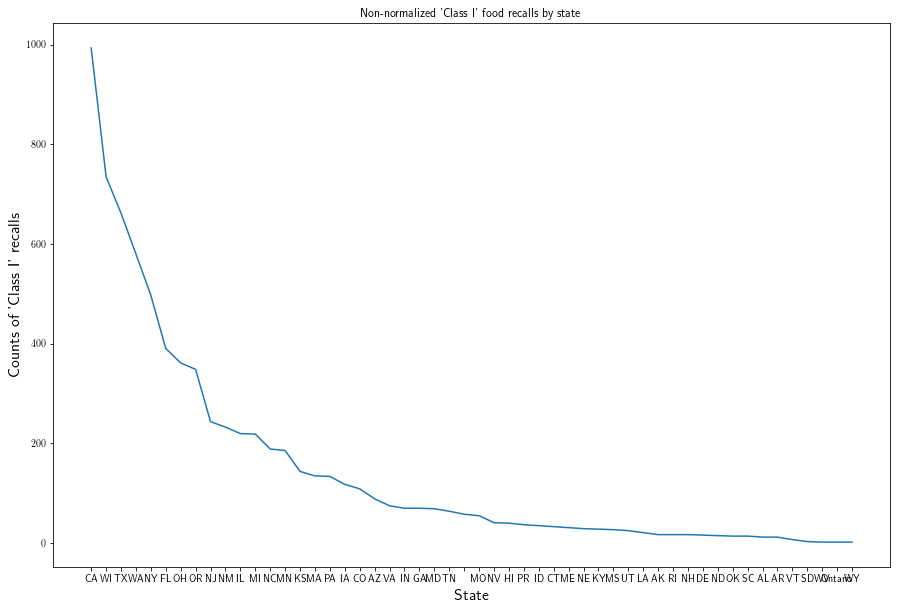

In [291]:
state_classI=grouped_classification.get_group('Class I').state.value_counts()
pl.figure(figsize=[15,10])
pl.plot(grouped_classification.get_group('Class I').state.value_counts())
pl.title("Non-normalized 'Class I' food recalls by state")
pl.xlabel('State',fontsize=16)
pl.ylabel("Counts of 'Class I' recalls",fontsize=16)


In [269]:
print(grouped_state.get_group('CA').agg({'city':'nunique'}))
grouped_state.get_group('CA').city.value_counts()

city    190
dtype: int64


City Of Industry    154
Salinas             153
Gardena             110
Los Angeles         102
Emeryville           77
Fresno               74
Sacramento           66
Vernon               61
Monterey             59
San Diego            53
Berkeley             51
Fullerton            45
Santa Barbara        34
Hayward              33
Monterey Park        33
San Francisco        29
Fremont              29
Irvine               29
Oxnard               28
Hacienda Heights     28
Petaluma             27
San Fernando         26
Union City           25
Pleasanton           22
Carson               22
Rancho Dominguez     19
Northridge           18
Ventura              18
Glendale             18
San Leandro          18
                   ... 
Fairfield             1
Livermore             1
Danville              1
Rosemead              1
Dinuba                1
Hercules              1
Oakdale               1
Lathrop               1
San Bernardino        1
Vallejo               1
Fontana         

In [272]:
#URL=http://quickstats.nass.usda.gov/results/CB269F71-5DDC-341C-8289-242FBCC4B04F
dfca=pd.read_csv('/Users/laurenbittle/jobs_resumes/TDI_Challenge/project/CA_sales_USDAquery.csv'\
                ,header='infer'\
                ,low_memory=False)
dfca.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 21 columns):
Program             4 non-null object
Year                4 non-null int64
Period              4 non-null object
Week Ending         0 non-null float64
Geo Level           4 non-null object
State               4 non-null object
State ANSI          4 non-null int64
Ag District         0 non-null float64
Ag District Code    0 non-null float64
County              0 non-null float64
County ANSI         0 non-null float64
Zip Code            0 non-null float64
Region              0 non-null float64
watershed_code      4 non-null int64
Watershed           0 non-null float64
Commodity           4 non-null object
Data Item           4 non-null object
Domain              4 non-null object
Domain Category     4 non-null object
Value               4 non-null object
CV (%)              1 non-null float64
dtypes: float64(9), int64(3), object(9)
memory usage: 752.0+ bytes


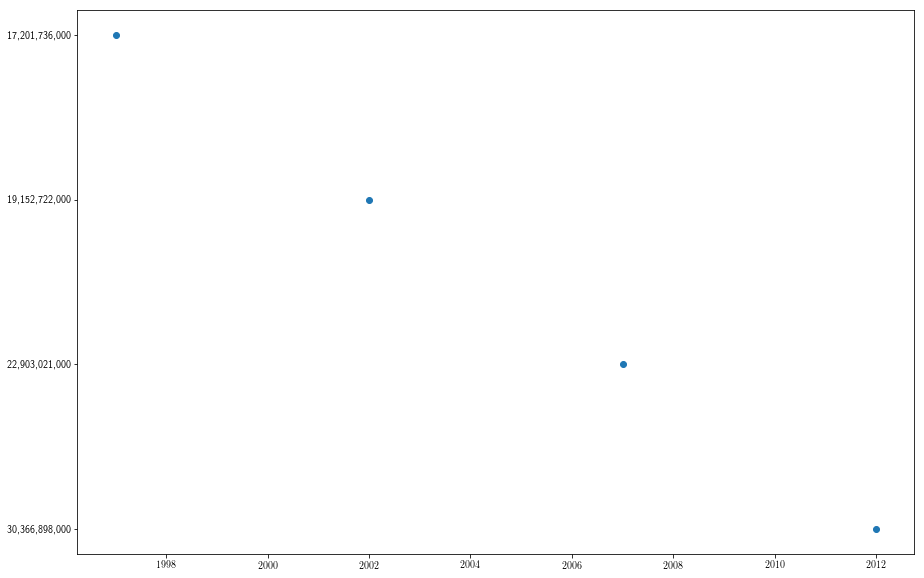

In [281]:
pl.figure(figsize=[15,10])
pl.scatter(dfca['Year'],dfca['Value'])#;pl.yscale('log')


In [381]:
dfops=pd.read_csv('/Users/laurenbittle/jobs_resumes/TDI_Challenge/project/allstates_operations_USDAquery.csv'\
                ,header='infer'\
                ,low_memory=False)

#Added a column of state abbreviations for joining to other 'df' later
state_col=[]#np.zeros(len(dfops['State']))
for iname in range(len(dfops['State'])):
    state_col.append(state_abbrev_dict.get_state_info(dfops['State'][iname].title(),state_keys))
dfops['state'] = np.asarray(state_col)

dfops.info()
#df1['e'] = p.Series(np.random.randn(sLength), index=df1.index)
#df1 = df1.assign(e=e.values)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 22 columns):
Program             150 non-null object
Year                150 non-null int64
Period              150 non-null object
Week Ending         0 non-null float64
Geo Level           150 non-null object
State               150 non-null object
State ANSI          150 non-null int64
Ag District         0 non-null float64
Ag District Code    0 non-null float64
County              0 non-null float64
County ANSI         0 non-null float64
Zip Code            0 non-null float64
Region              0 non-null float64
watershed_code      150 non-null int64
Watershed           0 non-null float64
Commodity           150 non-null object
Data Item           150 non-null object
Domain              150 non-null object
Domain Category     150 non-null object
Value               150 non-null object
CV (%)              150 non-null float64
state               150 non-null object
dtypes: float64(9), int64

In [404]:
dfops.head()#['Data Item'].unique()
dfops2=dfops[['Year'\
              ,'State'\
              ,'state'\
              ,'State ANSI'\
              ,'Commodity'\
              ,'Data Item'\
              ,'Domain'\
              ,'Value'\
              ,'CV (%)']]

df.head()#['Data Item'].unique()


,address_1,address_2,center_classification_date,city,classification,code_info,country,distribution_pattern,event_id,initial_firm_notification,...,product_type,reason_for_recall,recall_initiation_date,recall_number,recalling_firm,report_date,state,status,termination_date,voluntary_mandated
0,748 S Alameda St,,20120926,Los Angeles,Class II,not available.,United States,California,63150,E-Mail,...,Food,M & K Trading is recalling Korean Molluscan Sh...,20120921,F-2396-2012,M & K Trading Inc,20121003,CA,Terminated,20120926,Voluntary: Firm Initiated
1,4401 Foxdale St,,20120924,Irwindale,Class I,"UPC 7774523746, Use by dates 9/8/2012 or earli...",United States,Nationwide to following US States and Canada: ...,63062,Press Release,...,Food,"Firm is voluntarily recalling, out of an abund...",20120831,F-2382-2012,Ready Pac Foods Inc,20121003,CA,Terminated,20121025,Voluntary: Firm Initiated
2,2315 Moore Ave,,20120927,Fullerton,Class II,"UPC 0-30871-33001-2, Item # 0291710.",United States,Nationwide and Canada.,62991,Letter,...,Food,The firm recalled due to a potential non-safet...,20120712,F-2438-2012,Pulmuone Wildwood Inc,20121003,CA,Terminated,20121217,Voluntary: Firm Initiated
3,2315 Moore Ave,,20120927,Fullerton,Class II,"UPC 0-52334-11659-9, Item # 0291661.",United States,Nationwide and Canada.,62991,Letter,...,Food,The firm recalled due to a potential non-safet...,20120712,F-2436-2012,Pulmuone Wildwood Inc,20121003,CA,Terminated,20121217,Voluntary: Firm Initiated
4,1720 Locust Grove Road,,20120921,Manheim,Class II,"No codes; all product ""Purchase by date shown ...",United States,Product was distributed to specific wholesale ...,62465,Telephone,...,Food,FDA samples of product tested positive for Fum...,20120417,F-2374-2012,Haldeman Mills,20121003,PA,Terminated,20130716,Voluntary: Firm Initiated


In [405]:
#dfops2['State'].str.upper().unique()#.shape
#dfops2['State'][0].title()
#print(state_abbrev_dict.get_state_info(dfops2['State'][0].title(),state_keys))

#df['state'].str.upper().unique()
#state_classI.keys()

df_dfops2_merge=pd.merge(dfops2\
                        ,df\
                        ,how='inner'
                        ,on='state')

#df_type_zip_cen_merge

df_dfops2_merge.head()#['Data Item'].unique()#.info()



,Year,State,state,State ANSI,Commodity,Data Item,Domain,Value,CV (%),address_1,...,product_quantity,product_type,reason_for_recall,recall_initiation_date,recall_number,recalling_firm,report_date,status,termination_date,voluntary_mandated
0,2012,ALABAMA,AL,1,FARM OPERATIONS,FARM OPERATIONS - ACRES OPERATED,TOTAL,"8,902,654",3.1,208 Old Fort Drive,...,268 units of 3 oz,Food,"Pistachios, which were supplied by ARO and sub...",20130628,F-1732-2013,"Priester Pecan Company, Inc.",20131120,Terminated,20131112,Voluntary: Firm Initiated
1,2012,ALABAMA,AL,1,FARM OPERATIONS,FARM OPERATIONS - ACRES OPERATED,TOTAL,"8,902,654",3.1,208 Old Fort Drive,...,701.5 pounds,Food,"Pistachios, which were supplied by ARO and sub...",20130628,F-1730-2013,"Priester Pecan Company, Inc.",20131120,Terminated,20131112,Voluntary: Firm Initiated
2,2012,ALABAMA,AL,1,FARM OPERATIONS,FARM OPERATIONS - ACRES OPERATED,TOTAL,"8,902,654",3.1,801 N Main St,...,"2,200 lbs.",Food,One lot of raw peanuts was found to contain 26...,20141201,F-0744-2015,Sessions Co. Inc.,20141231,Terminated,20150120,Voluntary: Firm Initiated
3,2012,ALABAMA,AL,1,FARM OPERATIONS,FARM OPERATIONS - ACRES OPERATED,TOTAL,"8,902,654",3.1,22877 Highway 87,...,280 units,Food,Product testing at the supplier found aflatoxi...,20141201,F-0745-2015,"Pea River Peanut Company, LLC",20141231,Terminated,20141230,Voluntary: Firm Initiated
4,2012,ALABAMA,AL,1,FARM OPERATIONS,FARM OPERATIONS - ACRES OPERATED,TOTAL,"8,902,654",3.1,2435 US Highway 78,...,468 units,Food,The firm received a notice from their supplier...,20160802,F-1613-2017,J M Exotic Foods Inc,20170322,Terminated,20170329,Voluntary: Firm Initiated


In [332]:
reload(state_abbrev_dict)
state_keys=state_abbrev_dict.get_state_to_abbrev()
abbrev_keys=state_abbrev_dict.get_abbrev_to_state()


Maryland
None


In [1301]:
# MEAT TEXT SEARCH

#pd.Series(' '.join(df_produce['reason_for_recall']).lower().split()).value_counts()[:20]
df_meat=df_dfops2_merge[\
                        (df_dfops2_merge['product_description'].str.contains('meat')\
                        | df_dfops2_merge['reason_for_recall'].str.contains('meat')) ]
print(df_meat.shape)

df_meat['classification'].value_counts()
df_meat['state'].value_counts()

# CLASS * REASON TEXT SEARCH
pd.Series(' '.join(df_meat['reason_for_recall']).lower().split()).value_counts()[:20]

# CLASS I REASON TEXT SEARCH
pd.Series(' '.join(df_meat[df_meat['classification'] == 'Class I']['reason_for_recall']).lower().split()).value_counts()[:20]



(189, 33)


listeria          24
with              21
contaminated      21
product           18
the               18
monocytogenes     15
may               12
undeclared         9
monocytogenes.     9
be                 9
is                 9
products           9
contain            6
market             6
crab               6
farmer's           6
for                6
burgers            6
recalled           6
veggie             6
dtype: int64

In [1306]:
# DAIRY TEXT SEARCH

df_dairy=df_dfops2_merge[\
                        (df_dfops2_merge['product_description'].str.contains('dairy')\
                        | df_dfops2_merge['reason_for_recall'].str.contains('dairy')) ]
print(df_dairy.shape)

df_dairy['classification'].value_counts()
df_dairy['state'].value_counts()

# CLASS * REASON TEXT SEARCH
pd.Series(' '.join(df_dairy['reason_for_recall']).lower().split()).value_counts()[:20]

# CLASS I REASON TEXT SEARCH
pd.Series(' '.join(df_dairy[df_dairy['classification'] == 'Class I']['reason_for_recall']).lower().split()).value_counts()[:20]



(198, 33)


the           102
to             78
is             75
of             72
undeclared     63
due            54
products       42
go             42
dairy          42
recalling      39
milk.          36
which          30
an             27
are            27
statement      27
a              27
recalled       27
free.          24
with           24
foods          24
dtype: int64

In [1310]:
# GRAIN TEXT SEARCH

df_grain=df_dfops2_merge[\
                        (df_dfops2_merge['product_description'].str.contains('grain')\
                        | df_dfops2_merge['reason_for_recall'].str.contains('grain')) ]
print(df_grain.shape)

df_grain['classification'].value_counts()
df_grain['state'].value_counts()

# CLASS * REASON TEXT SEARCH
pd.Series(' '.join(df_grain['reason_for_recall']).lower().split()).value_counts()[:20]

# CLASS I REASON TEXT SEARCH
pd.Series(' '.join(df_grain[df_grain['classification'] == 'Class I']['reason_for_recall']).lower().split()).value_counts()[:20]



(144, 33)


the           48
that          36
of            33
product       24
milk          24
on            24
ingredient    24
not           21
is            21
firm          21
and           21
declared      18
was           18
contain       15
an            15
supplier      15
notified      15
vegetable     15
by            15
label.        15
dtype: int64

In [1314]:
# PRODUCE TEXT SEARCH

df_produce=df_dfops2_merge[\
                        (df_dfops2_merge['product_description'].str.contains('produce')\
                        | df_dfops2_merge['reason_for_recall'].str.contains('produce')) ]
print(df_produce.shape)

df_produce['classification'].value_counts()
df_produce['state'].value_counts()

# CLASS * REASON TEXT SEARCH
pd.Series(' '.join(df_produce['reason_for_recall']).lower().split()).value_counts()[:20]

# CLASS I REASON TEXT SEARCH
pd.Series(' '.join(df_produce[df_produce['classification'] == 'Class I']['reason_for_recall']).lower().split()).value_counts()[:20]


# TRY THIS
#s.str.rsplit(n=2) # splits by every other word


(1737, 33)


the               1308
products          1149
to                 918
and                897
produced           882
with               834
of                 732
ice                711
cream              693
listeria           603
by                 579
recalled           558
monocytogenes.     528
be                 501
a                  489
due                423
all                369
potential          357
contaminated       354
is                 336
dtype: int64

In [ ]:
df_dfops2_merge['report_date']

c1search=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class I') \
                      & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')]
acres_I=c1search.sort_index(level='state').drop_duplicates('state').Value.str.replace(',','').astype(int64)
class_I_statecounts_peracres=class_I_statecounts.sort_index(level=0)/acres_I.values


In [ ]:
#df_beef=df[df['product_description'].str.contains('beef')] #4
#print(df_beef.shape)
#df_pork=df[df['product_description'].str.contains('pork')] #3
#print(df_pork.shape)
#df_poultry=df[df['product_description'].str.contains('poultry')] # 0 poultry hits
#print(df_poultry.shape) # 0 poultry hits
df_grain=df[df['product_description'].str.contains('grain')]
print(df_grain.shape)
df_dairy=df[df['product_description'].str.contains('dairy')]
print(df_dairy.shape)
df_produce=df[df['product_description'].str.contains('produce')]
print(df_produce.shape)


In [702]:
dgroup=df_dfops2_merge.groupby(['Data Item','classification']).get_group(('FARM OPERATIONS - AREA OPERATED, MEASURED IN ACRES / OPERATION','Class I'))
#dgroup.head()


39


Text(0.5,1,'Number of Recalls in each State')

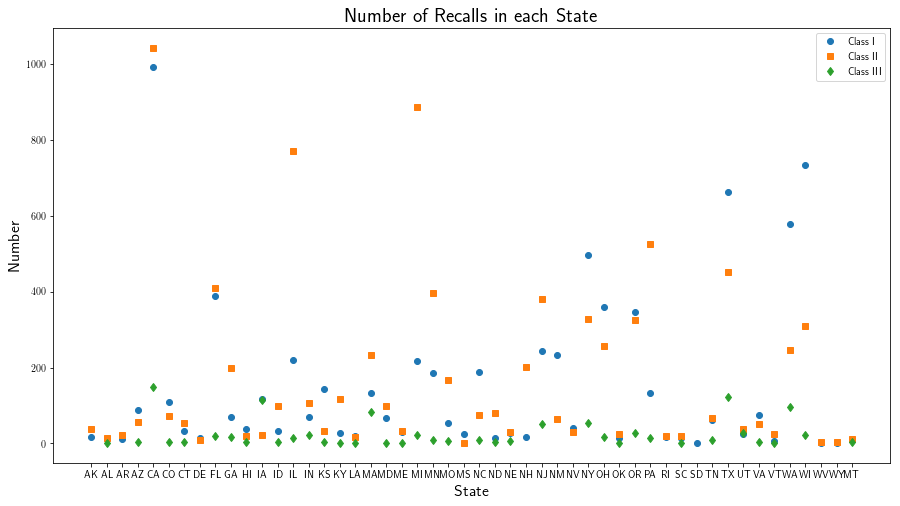

In [1195]:
# PLOTTING
pl.figure(figsize=[15,8])

class_III_statecounts=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class III') \
                      & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')].state.value_counts()

class_II_statecounts=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class II') \
                      & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')].state.value_counts()

class_I_statecounts=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class I') \
                      & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')].state.value_counts()

#print(class_III_statecounts.sort_index(level=0))

print(len(class_III_statecounts.values)) #39 states have Class III counts.
pl.plot(class_I_statecounts.sort_index(level=0)\
        ,marker='o',linestyle='None',label='Class I')
pl.plot(class_II_statecounts.sort_index(level=0)\
        ,marker='s',linestyle='None',label='Class II')
pl.plot(class_III_statecounts.sort_index(level=0)\
        ,marker='d',linestyle='None',label='Class III')
pl.legend(loc=1)
pl.xlabel('State',fontsize=16)
pl.ylabel('Number',fontsize=16)
pl.title('Number of Recalls in each State',fontsize=20)


Text(0.5,1,'Number of Recalls per Total Acres Farmed in each State')

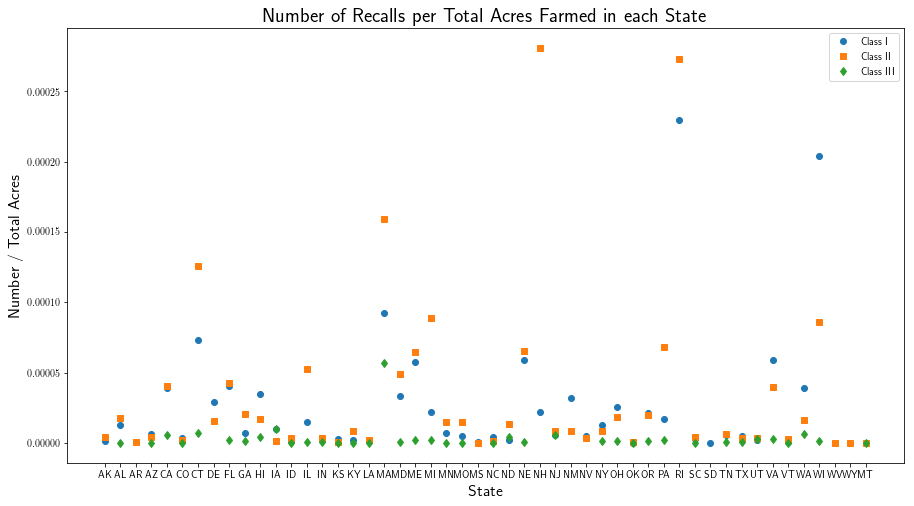

In [1281]:
c3search=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class III') \
                      & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')]
acres_III=c3search.sort_index(level='state').drop_duplicates('state').Value.str.replace(',','').astype(int64)
class_III_statecounts_peracres=class_III_statecounts.sort_index(level=0)/acres_III.values


c2search=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class II') \
                      & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')]
acres_II=c2search.sort_index(level='state').drop_duplicates('state').Value.str.replace(',','').astype(int64)
class_II_statecounts_peracres=class_II_statecounts.sort_index(level=0)/acres_II.values


c1search=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class I') \
                      & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')]
acres_I=c1search.sort_index(level='state').drop_duplicates('state').Value.str.replace(',','').astype(int64)
class_I_statecounts_peracres=class_I_statecounts.sort_index(level=0)/acres_I.values





pl.figure(figsize=[15,8])
pl.plot(class_I_statecounts_peracres\
        ,marker='o',linestyle='None',label='Class I')
pl.plot(class_II_statecounts_peracres\
        ,marker='s',linestyle='None',label='Class II')
pl.plot(class_III_statecounts_peracres\
        ,marker='d',linestyle='None',label='Class III')
pl.legend(loc=1)
pl.xlabel('State',fontsize=16)
pl.ylabel('Number / Total Acres',fontsize=16)
pl.title('Number of Recalls per Total Acres Farmed in each State',fontsize=20)








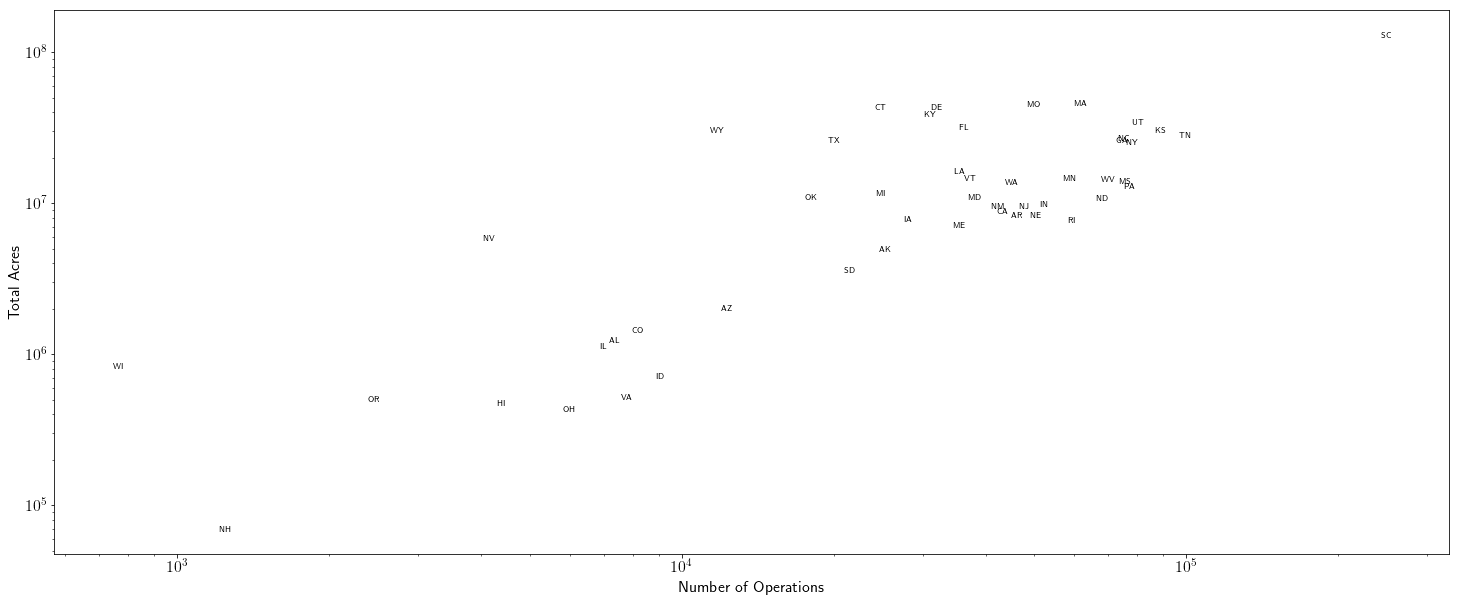

In [779]:

pl.figure(figsize=[25,10])
pl.scatter(opers_classI\
           ,acres_classI\
           ,alpha=0)

for ib in range(len(bars)):
    pl.annotate(bars[ib]\
                ,(opers_classI[ib],acres_classI[ib])\
                ,horizontalalignment='center'\
                ,verticalalignment='center'\
                ,size=8\
                ,weight='ultralight')

pl.xscale('log')
pl.yscale('log')
pl.xlabel('Number of Operations',fontsize=16)
pl.ylabel('Total Acres',fontsize=16)
pl.tick_params(labelsize=16)



2012 2019


(array([1047., 1015.,  734., 1661., 1332., 1116.,  502.]),
 array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
 <a list of 7 Patch objects>)

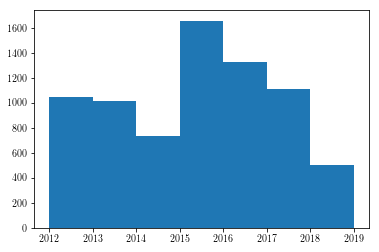

In [1481]:
c1search=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class I') \
                      & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')]
acres_I=c1search.sort_index(level='state').drop_duplicates('state').Value.str.replace(',','').astype(int64)
class_I_statecounts_peracres=class_I_statecounts.sort_index(level=0)/acres_I.values


list(c1search['report_date'])[5][0:4]


report_year=[]
for ix in range(len(c1search)):
    #print(ix,c1search['report_date'][ix])
    report_year.append(list(c1search['report_date'])[ix][0:4])# for x in range(len(c1search['resport_date']))

report_year=np.sort(report_year).astype('int')
nyears=np.unique(report_year)

report_year

print(np.min(report_year),np.max(report_year))
pl.hist(report_year,bins=nyears,align='mid')


#pd.to_datetime(c1search.report_date,yearfirst=True).datetime.year()



#pl.figure()
#pl.plot(c1search.sort_index(level='state').report_date)


In [1252]:
# # LOOKING AT CLASS I RECALLS
dgroup_acres=df_dfops2_merge.groupby(['Data Item','classification']).get_group(('FARM OPERATIONS - ACRES OPERATED','Class I'))
dgroup_opers=df_dfops2_merge.groupby(['Data Item','classification']).get_group(('FARM OPERATIONS - NUMBER OF OPERATIONS','Class I'))

dgroup_state=dgroup_acres.groupby('state')
bars=dgroup_acres['state'].value_counts().keys() # state abbreviations
classI_per_state=dgroup_acres['state'].value_counts() # number of Class I recalls in each state
#yvals_denom=dgroup.drop_duplicates('state').Value.str.replace(',','').astype(float)

#print(bars)
acres_classI=dgroup_acres.drop_duplicates('state').Value.str.replace(',','').astype(float)
totalacres_classI=acres_classI.values
opers_classI=dgroup_opers.drop_duplicates('state').Value.str.replace(',','').astype(float)
totalopers_classI=opers_classI.values
print(len(acres_classI),len(opers_classI),len(bars))

classI_per_totalacres=classI_per_state/totalacres_classI
classI_per_totalopers=classI_per_state/totalopers_classI

print(totalacres_classI)


49 49 49
[8.90265400e+06 8.33861000e+05 2.62491950e+07 1.38107860e+07
 2.55690010e+07 3.18866760e+07 4.36539000e+05 5.08652000e+05
 9.54834200e+06 9.62083600e+06 1.12931700e+06 1.17601090e+07
 2.69377210e+07 1.47203960e+07 3.06227310e+07 4.61372950e+07
 1.30493470e+07 7.90086400e+06 1.45410400e+06 2.03074500e+06
 5.23517000e+05 9.94856400e+06 2.60358380e+07 1.09310800e+07
 2.82661370e+07 4.53317830e+07 5.91376100e+06 4.74065000e+05
 7.15057000e+05 4.32010230e+07 7.18357600e+06 8.41475600e+06
 3.92626130e+07 1.39606040e+07 3.43561100e+07 1.63015780e+07
 7.70444400e+06 6.95890000e+04 4.97124400e+06 4.32570790e+07
 1.08678120e+07 1.30153438e+08 1.09743960e+07 1.25171300e+06
 8.30244400e+06 1.47481070e+07 3.60667400e+06 1.45689260e+07
 3.03636410e+07]


In [1160]:
df_dfops2_merge.agg({'state': 'nunique'})
state_group=df_dfops2_merge.groupby('state')
#state_group.groupby('classification')


In [903]:
# # LOOKING AT CLASS II RECALLS
dgroup_acres_II=df_dfops2_merge.groupby(['Data Item','classification']).get_group(('FARM OPERATIONS - ACRES OPERATED','Class II'))
dgroup_opers_II=df_dfops2_merge.groupby(['Data Item','classification']).get_group(('FARM OPERATIONS - NUMBER OF OPERATIONS','Class II'))

dgroup_state_II=dgroup_acres_II.groupby('state')
bars_II=dgroup_acres_II['state'].value_counts().keys() # state abbreviations
classII_per_state=dgroup_acres_II['state'].value_counts() # number of Class II recalls in each state
#classII_per_stateO=dgroup_opers_II['state'].value_counts() # number of Class II recalls in each state
#print(len(classII_per_stateA),len(classII_per_stateO))

acres_classII=dgroup_acres_II.drop_duplicates('state').Value.str.replace(',','').astype(float)
totalacres_classII=acres_classII.values
opers_classII=dgroup_opers_II.drop_duplicates('state').Value.str.replace(',','').astype(float)
totalopers_classII=opers_classII.values
print(len(acres_classII),len(opers_classII),len(bars_II))

classII_per_totalacres=classII_per_state/totalacres_classII
classII_per_totalopers=classII_per_state/totalopers_classII


49 49 49


In [904]:
df_dfops2_merge.groupby('state')['classification'].get_group('CA').value_counts()

df_dfops2_merge.groupby('state').apply(lambda x: x[x['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED'])

# make a pd df from the stateINFO dictionary
#pd.DataFrame.from_dict(data\
#                       ,orient='index'\
#                       ,columns=['A', 'B', 'C', 'D'])


stateINFO={}
stateINFO['test'].values

for istate in df_dfops2_merge['state'].unique():
    for idi in d_dfops2_merge['Data Item']:
        stateINFO[istate].

    
    
    



SyntaxError: invalid syntax (<ipython-input-904-92009505a74b>, line 13)

In [1034]:
dfs=df_dfops2_merge.sort_values(by='state')
dfs.groupby(['state','classification','Data Item']).count()
dfs_index=dfs.set_index(['state','Data Item'])#,'classification'])
class_counts=dfs_index.groupby(level=[0,1])['classification'].value_counts()#.agg({'classification': 'count'})
#class_counts=dfs_index.groupby(level=[0])['Data Item','classification'].count()#.agg({'classification': 'count'})
#class_counts

dfs_acre=dfs[dfs['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED']
dfs_acre.groupby(['state','classification']).describe()

'Class III' in dfs_acre.groupby('state').get_group('AK').agg({'classification': 'unique'})

c1test=dfs.groupby(['Data Item','classification'])['state'].get_group(('FARM OPERATIONS - ACRES OPERATED','Class I'))


c1=class_counts.groupby(['Data Item','classification']).get_group(('FARM OPERATIONS - ACRES OPERATED','Class I'))
c2=class_counts.groupby(['Data Item','classification']).get_group(('FARM OPERATIONS - ACRES OPERATED','Class II'))
c3=class_counts.groupby(['Data Item','classification']).get_group(('FARM OPERATIONS - ACRES OPERATED','Class III'))


dfs_acre_classIII=dfs_acre[dfs_acre['classification'] == 'Class III']


class_counts.get_values




#df_dfops2_merge.groupby(['state','classification','Data Item']).describe()

#df_dfops2_merge.groupby(['state','classification','Data Item'])['Data Item'].()


                                                    

state  Data Item                                                       classification    
AK     FARM OPERATIONS - ACRES OPERATED                                Class II               38
                                                                       Class I                16
       FARM OPERATIONS - AREA OPERATED, MEASURED IN ACRES / OPERATION  Class II               38
                                                                       Class I                16
       FARM OPERATIONS - NUMBER OF OPERATIONS                          Class II               38
                                                                       Class I                16
AL     FARM OPERATIONS - ACRES OPERATED                                Class II               15
                                                                       Class I                11
                                                                       Class III               1
                                     

In [ ]:

for istate in dfs_acre['state']:
    
    if 'Class I' not in dfs_acre.groupby('state').get_group(istate).agg({'classification': 'unique'}):
        dfs_acre['classification']
    if 'Class II' not in dfs_acre.groupby('state').get_group(istate).agg({'classification': 'unique'})

    if 'Class III' not in dfs_acre.groupby('state').get_group(istate).agg({'classification': 'unique'})



In [929]:
# # LOOKING AT CLASS III RECALLS
dgroup_acres_III=df_dfops2_merge.groupby(['Data Item','classification']).get_group(('FARM OPERATIONS - ACRES OPERATED','Class III'))
dgroup_opers_III=df_dfops2_merge.groupby(['Data Item','classification']).get_group(('FARM OPERATIONS - NUMBER OF OPERATIONS','Class III'))

dgroup_state_III=dgroup_acres_III.groupby('state')
bars_III=dgroup_acres_III['state'].value_counts().keys() # state abbreviations
classIII_per_state=dgroup_acres_III['state'].value_counts() # number of Class III recalls in each state
#classIII_per_stateO=dgroup_opers_III['state'].value_counts() # number of Class III recalls in each state
#print(len(classIII_per_stateA),len(classIII_per_stateO))
print(dgroup_state_III['state'].value_counts().keys())
# not all states have Class III recalls

acres_classIII=dgroup_acres_III.drop_duplicates('state').Value.str.replace(',','').astype(float)
totalacres_classIII=acres_classIII.values
opers_classIII=dgroup_opers_III.drop_duplicates('state').Value.str.replace(',','').astype(float)
totalopers_classIII=opers_classIII.values
print(len(acres_classIII),len(opers_classIII),len(bars_III))

classIII_per_totalacres=classIII_per_state/totalacres_classIII
classIII_per_totalopers=classIII_per_state/totalopers_classIII



MultiIndex(levels=[['AL', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MT', 'NC', 'ND', 'NE', 'NJ', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI'], ['AL', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MT', 'NC', 'ND', 'NE', 'NJ', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI']],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]],
           names=['state', 'state'])
39 39 39


In [1157]:
nstates=df_dfops2_merge.agg({'state': 'nunique'})
#for istate in range(len(nstates)):
#    if 'Class III' not in dfs_acre.groupby('state').get_group(istate).agg({'classification': 'unique'})

class_III_counts=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class III') \
                      & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')].state.value_counts()


print(len(class_III_counts.index))

#for istate in df_dfops2_merge['state'].unique():
#    if istate not in class_III_counts.index:
#        print(istate)
        #print('{0} is not in c3 list'.format(istate))
        #class_III_counts.append(pd.Series(0,{istate}))


#s3=pd.Series([9999],{'TEST'})
#class_III_counts.value_counts.append(s3,ignore_index=True)
#class_III_counts.append({'TEST':0})
#pl.plot(df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class III') \
#                      & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')].state.value_counts())

print(class_III_counts.index)
print(class_III_counts.values)




39
Index(['CA', 'TX', 'IA', 'WA', 'MA', 'NY', 'NJ', 'UT', 'OR', 'IN', 'WI', 'MI',
       'FL', 'OH', 'GA', 'PA', 'IL', 'MN', 'TN', 'NC', 'NE', 'MO', 'HI', 'CO',
       'KS', 'ID', 'VA', 'CT', 'MT', 'ND', 'AZ', 'MD', 'SC', 'KY', 'VT', 'LA',
       'ME', 'AL', 'OK'],
      dtype='object')
[150 123 115  95  83  54  50  28  27  23  22  22  20  18  17  15  14   9
   9   9   6   6   5   5   4   4   4   3   3   3   3   2   2   2   2   1
   1   1   1]


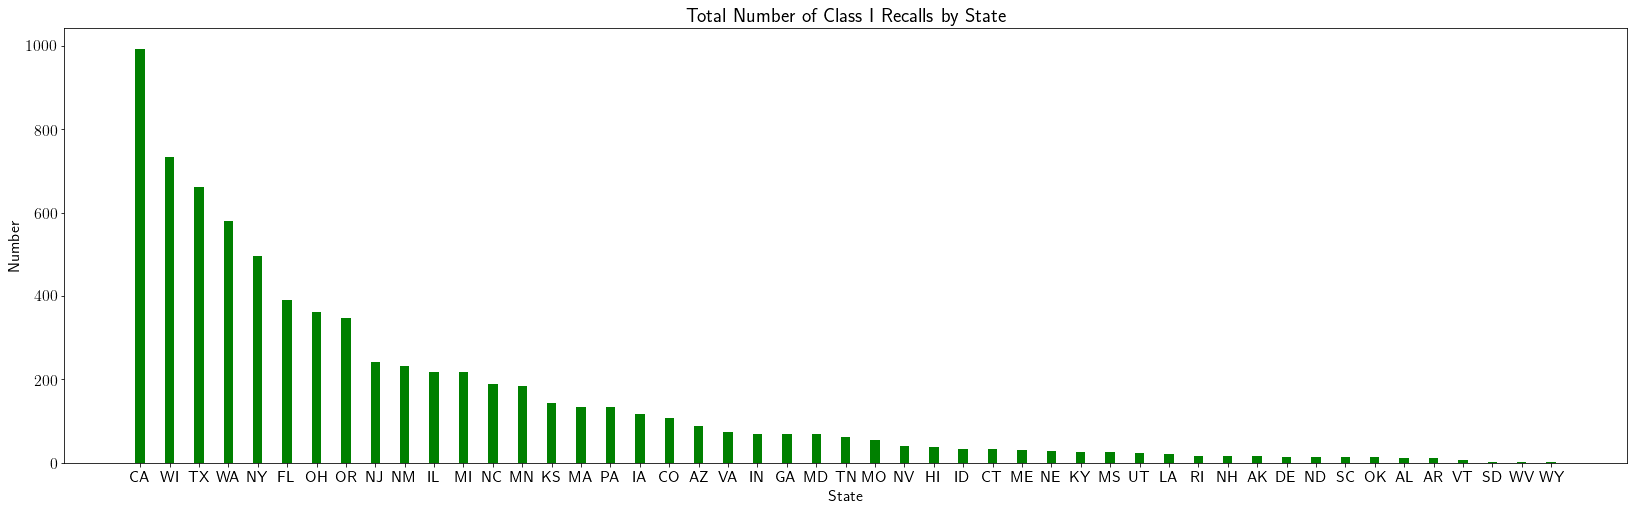

In [1158]:
# # PLOTTING TOTAL NUMBER OF CLASS I RECALLS IN EACH STATE
yposI=np.linspace(0,150,len(bars))
yposIII=np.linspace(0,150,len(bars_III))

pl.figure(figsize=[28,8])
pl.bar(ypos,classI_per_state,width=1,color='g')
#pl.bar(ypos,classII_per_state,width=1,color='lime',alpha=0.5)
#pl.bar(yposIII,classIII_per_state,width=1,color='y',alpha=0.7) # fill in missing states with empty values for class III recalls



pl.xticks(ypos,bars)
pl.xlabel('State',fontsize=16)
pl.ylabel('Number',fontsize=16)
pl.title('Total Number of Class I Recalls by State',fontsize=20)
#pl.ylabel('Number of Class I recalls / acre-per-operation',fontsize=16)
pl.tick_params(labelsize=16)

In [880]:
print(bars[0:10])
print(bars_II[0:10])
print(bars_III[0:10])

Index(['CA', 'WI', 'TX', 'WA', 'NY', 'FL', 'OH', 'OR', 'NJ', 'NM'], dtype='object')
Index(['CA', 'MI', 'IL', 'PA', 'TX', 'FL', 'MN', 'NJ', 'NY', 'OR'], dtype='object')
Index(['CA', 'TX', 'IA', 'WA', 'MA', 'NY', 'NJ', 'UT', 'OR', 'IN'], dtype='object')


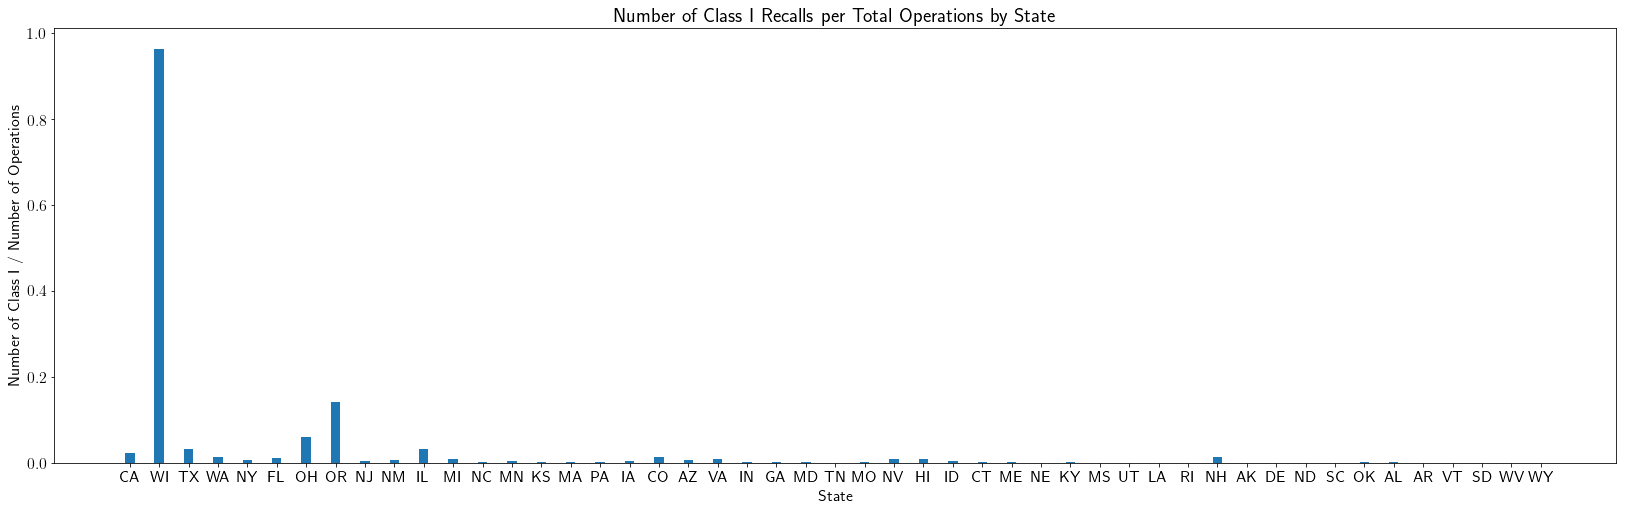

In [799]:
# # PLOTTING NUMBER OF CLASS I RECALLS PER OPERATIONS IN EACH STATE
ypos=np.linspace(0,150,len(bars))

pl.figure(figsize=[28,8])
#pl.bar(xvals,yvals_num/yvals_denom,width=0.4)
pl.bar(ypos,classI_per_totalopers,width=1)
#pl.bar(ypos,peracres,width=1,color='m')

pl.xticks(ypos,bars)
pl.xlabel('State',fontsize=16)
pl.ylabel('Number of Class I / Number of Operations',fontsize=16)
pl.title('Number of Class I Recalls per Total Operations by State',fontsize=20)
#pl.ylabel('Number of Class I recalls / acre-per-operation',fontsize=16)
pl.tick_params(labelsize=16)

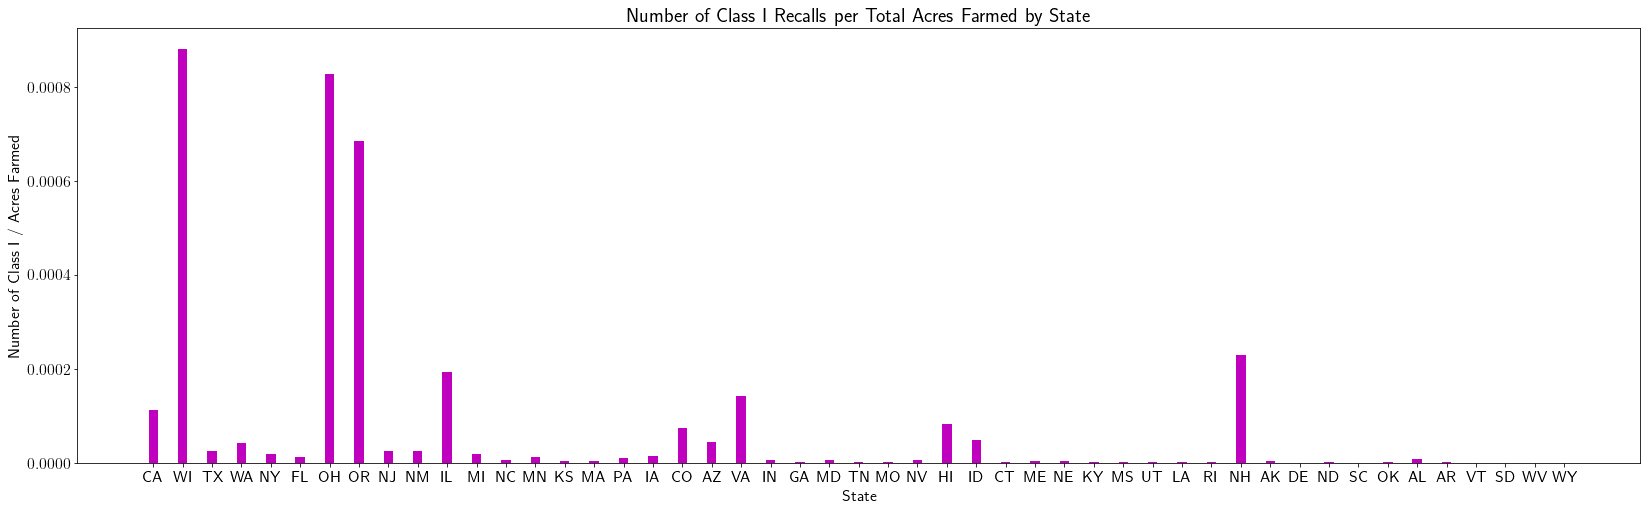

In [802]:
# # PLOTTING NUMBER OF CLASS I RECALLS PER ACRES FARMED IN EACH STATE
ypos=np.linspace(0,150,len(bars))

pl.figure(figsize=[28,8])
#pl.bar(xvals,yvals_num/yvals_denom,width=0.4)
pl.bar(ypos,classI_per_totalacres,width=1,color='m')

pl.xticks(ypos,bars)
pl.xlabel('State',fontsize=16)
pl.ylabel('Number of Class I / Acres Farmed',fontsize=16)
pl.title('Number of Class I Recalls per Total Acres Farmed by State',fontsize=20)

#pl.ylabel('Number of Class I recalls / acre-per-operation',fontsize=16)
pl.tick_params(labelsize=16)